# Importing Libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries different ensemble classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)


# Loading Data

In [2]:
df = pd.read_csv('boat_data.csv')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


# Data Analysis & Data Preparation

In [3]:
# information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [4]:
# checking for the missing values
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

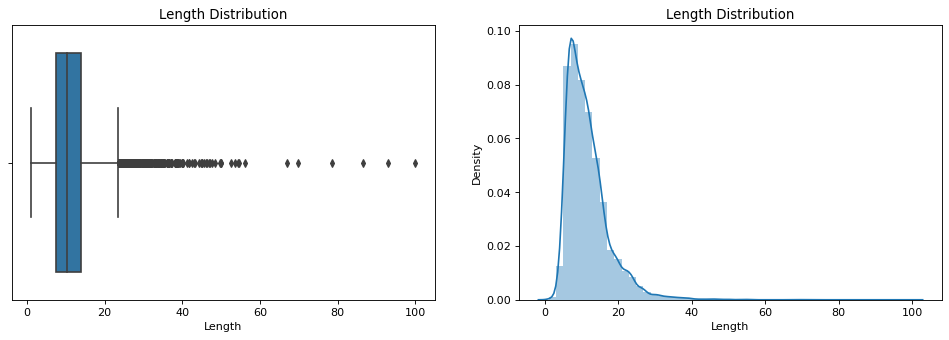

In [5]:
# Distribution of length variable
fig = plt.figure(figsize=(15,10), dpi=80)
ax1 = fig.add_subplot(223)
sns.boxplot(df.Length)
ax1.set_title("Length Distribution")
ax2 = fig.add_subplot(224)
sns.distplot(df.Length)
ax2.set_title("Length Distribution")
plt.savefig('Height Distributions.png')

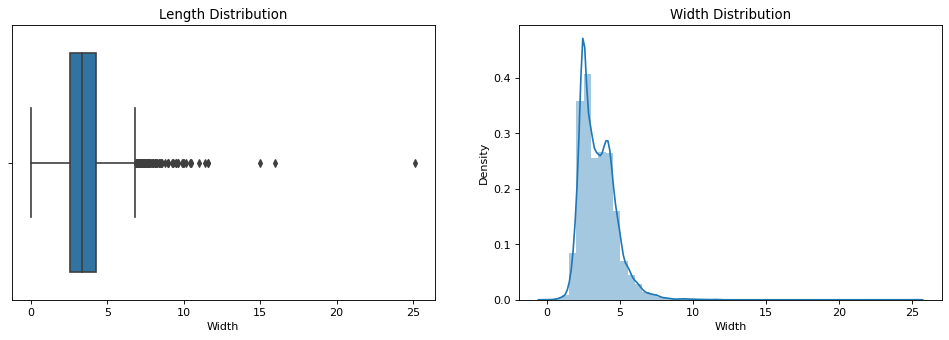

In [6]:
# Distribution of length variable
fig = plt.figure(figsize=(15,10), dpi=80)
ax1 = fig.add_subplot(223)
sns.boxplot(df.Width)
ax1.set_title("Length Distribution")
ax2 = fig.add_subplot(224)
sns.distplot(df.Width)
ax2.set_title("Width Distribution")
plt.savefig('Width Distributions.png')

In [7]:
# handling missing values
df['Length'] = df['Length'].fillna(df['Length'].median())
df['Width'] = df['Width'].fillna(df['Width'].median())

In [8]:
df = df.dropna()

In [9]:
# data after handling missing data
df.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

In [10]:
print(df['Year Built'].value_counts())

2020    976
2019    486
0       430
2008    333
2007    277
2006    274
2018    261
2017    234
2005    224
2009    200
2004    189
2016    176
2011    158
2003    157
2010    155
2001    150
2000    144
2015    140
2002    139
2014    127
2012    126
2013    112
1996    111
1999    110
1992    104
1991    103
1995    100
1997     88
1990     87
1998     85
1994     73
1993     69
1989     58
1988     52
2021     48
1980     37
1986     36
1987     34
1985     33
1979     33
1984     30
1978     28
1976     27
1981     27
1983     21
1982     18
1972     17
1974     17
1975     13
1973     11
1977     10
1971      8
1970      8
1967      7
1969      7
1965      7
1961      7
1968      7
1958      5
1963      5
1966      3
1962      3
1964      3
1956      2
1910      2
1959      2
1951      1
1923      1
1911      1
1954      1
1946      1
1922      1
1912      1
1957      1
1933      1
1913      1
1901      1
1940      1
1930      1
Name: Year Built, dtype: int64


In [11]:
# droping the years with value 0
df = df[df['Year Built']!=0]

In [12]:
# separating currency from price
df['Currency'] = df.loc[:,'Price'].str.slice(0,3)
df['Price'] = df['Price'].str.replace(r'[A-Z\D\W]', '')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR
10,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239,CHF
12,3500,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69,EUR
13,4600,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113,CHF


In [13]:
df['Currency'].unique()

array(['EUR', 'CHF', 'DKK', 'Â£ '], dtype=object)

In [14]:
df['Price'] = pd.to_numeric(df['Price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6607 entries, 1 to 9887
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        6607 non-null   int64  
 1   Boat Type                    6607 non-null   object 
 2   Manufacturer                 6607 non-null   object 
 3   Type                         6607 non-null   object 
 4   Year Built                   6607 non-null   int64  
 5   Length                       6607 non-null   float64
 6   Width                        6607 non-null   float64
 7   Material                     6607 non-null   object 
 8   Location                     6607 non-null   object 
 9   Number of views last 7 days  6607 non-null   int64  
 10  Currency                     6607 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 619.4+ KB


In [15]:
# checking outliers
numeric_cols = df.select_dtypes(['float64','int64']).columns
categoric_cols = df.select_dtypes('object').columns


In [18]:
numeric_cols = ['Price', 'Year Built', 'Length', 'Width','Number of views last 7 days']

<AxesSubplot:>

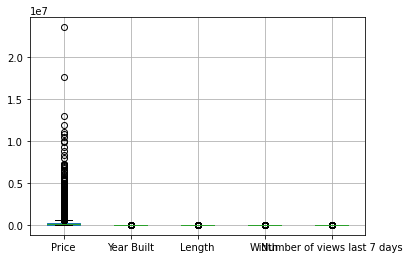

In [19]:
df.boxplot(numeric_cols)

<AxesSubplot:xlabel='Price'>

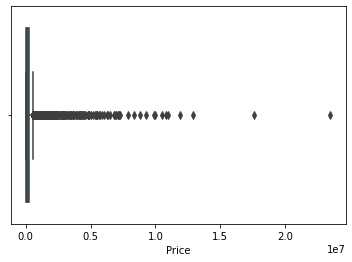

In [21]:
import seaborn as sns
sns.boxplot(x=df['Price'])

In [22]:
# statistical summary
df.describe()

,Price,Year Built,Length,Width,Number of views last 7 days
count,6.607000e+03,6607.000000,6607.000000,6607.000000,6607.000000
mean,2.904131e+05,2006.764038,11.228538,3.476063,162.011200
std,7.927469e+05,12.658449,5.177174,1.120912,170.771177
min,3.399000e+03,1901.000000,2.320000,0.860000,13.000000
25%,4.499450e+04,2000.000000,7.470000,2.550000,73.000000
50%,9.500000e+04,2008.000000,10.000000,3.300000,113.000000
75%,2.499975e+05,2018.000000,13.720000,4.200000,187.000000
max,2.350000e+07,2021.000000,56.000000,16.000000,3263.000000


## Univariate Bivariate & Multivariate Graphs

<AxesSubplot:>

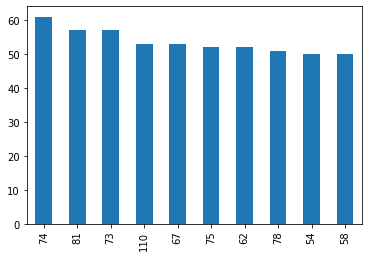

In [25]:
df['Number of views last 7 days'].value_counts().head(10).plot.bar()

<AxesSubplot:>

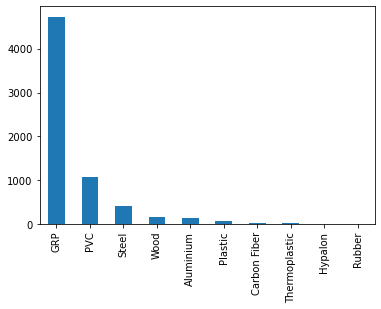

In [27]:
df['Material'].value_counts().head(10).plot.bar()

<AxesSubplot:>

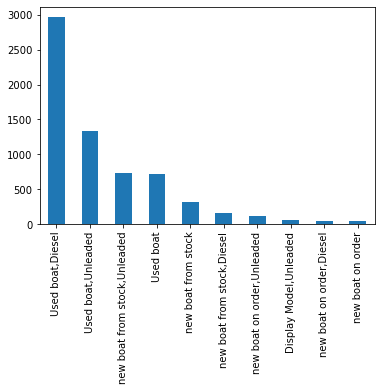

In [28]:
df['Type'].value_counts().head(10).plot.bar()

<AxesSubplot:>

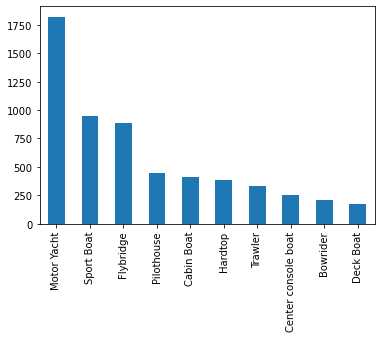

In [29]:
df['Boat Type'].value_counts().head(10).plot.bar()

<AxesSubplot:xlabel='Currency', ylabel='count'>

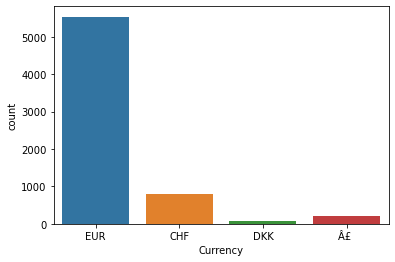

In [31]:
sns.countplot(x='Currency',data=df)

<AxesSubplot:xlabel='Material', ylabel='Number of views last 7 days'>

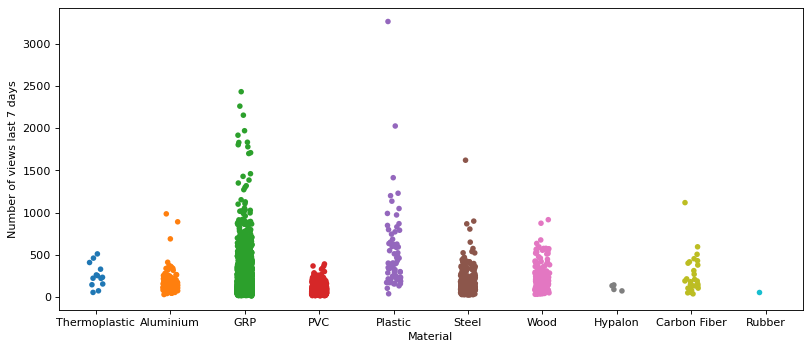

In [37]:
fig = plt.figure(figsize=(12,5), dpi=80)
sns.stripplot(x="Material", y="Number of views last 7 days", data=df)

In [41]:
most_viewed = df[df['Number of views last 7 days'] > 500].sort_values('Number of views last 7 days', ascending=False)

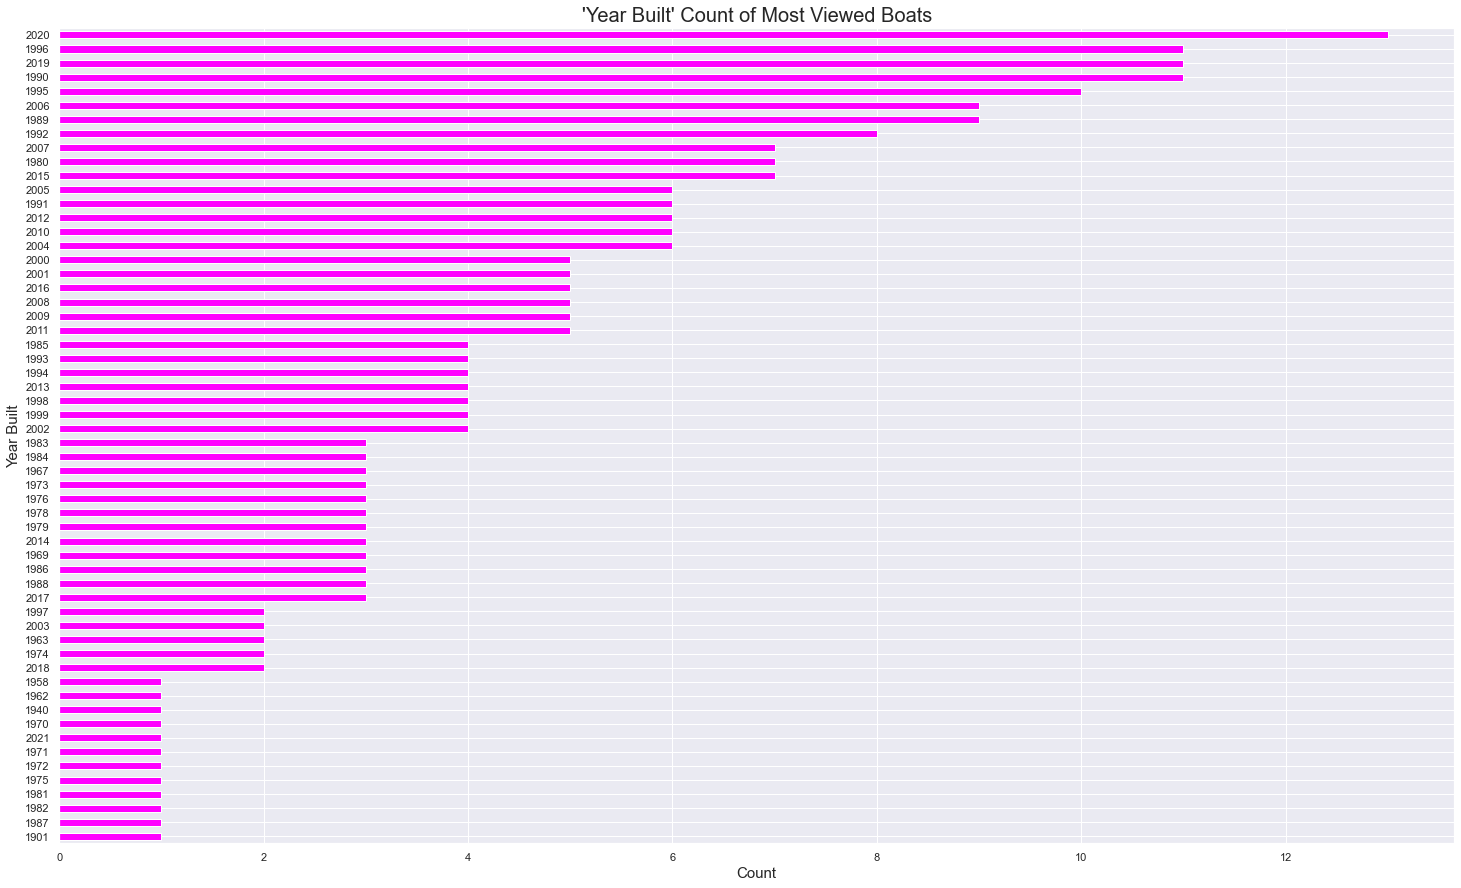

In [44]:
sns.set()
fig = plt.figure(figsize=(25, 15))
year = most_viewed.groupby('Year Built').size().sort_values(ascending=True)
g = year.plot(kind='barh',colormap='spring',edgecolor='white')
plt.xlabel("Count", size=15)
plt.ylabel('Year Built', size=15)
plt.title("'Year Built' Count of Most Viewed Boats", size=20);



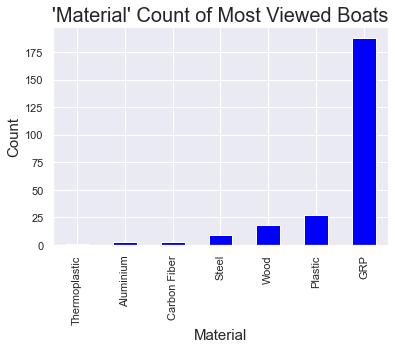

In [47]:
year = most_viewed.groupby('Material').size().sort_values(ascending=True)
g= year.plot(kind='bar',color= 'blue')
plt.xlabel("Material", size=15)
plt.ylabel('Count', size=15)
plt.title("'Material' Count of Most Viewed Boats", size=20);

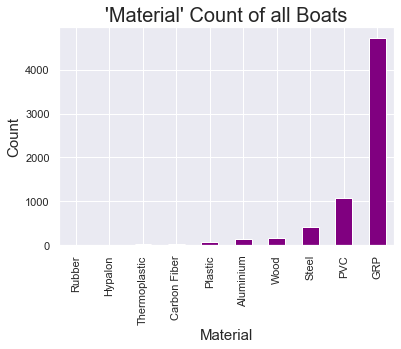

In [49]:
year_b = df.groupby('Material').size().sort_values(ascending=True)
g= year_b.plot(kind='bar',color='purple')
plt.xlabel("Material", size=15)
plt.ylabel('Count', size=15)
plt.title("'Material' Count of all Boats", size=20);

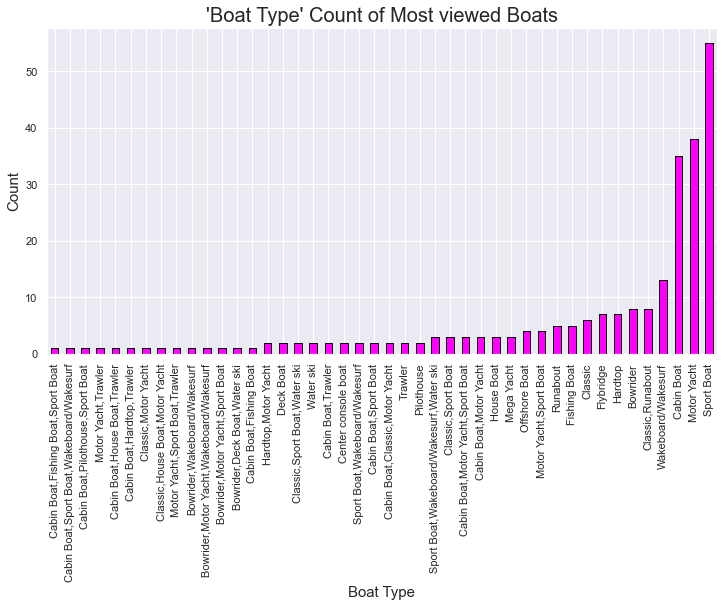

In [50]:
import matplotlib.ticker as ticker
fig = plt.figure(figsize=(12,6))
btype = most_viewed.groupby('Boat Type').size().sort_values(ascending=True)
g = btype.plot(kind='bar',colormap='cool_r', edgecolor='black')
g.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
plt.xlabel("Boat Type", size=15)
plt.ylabel("Count", size=15)
plt.title("'Boat Type' Count of Most viewed Boats", size=20)
plt.savefig('Boattype(most_viewed).png')
plt.show();

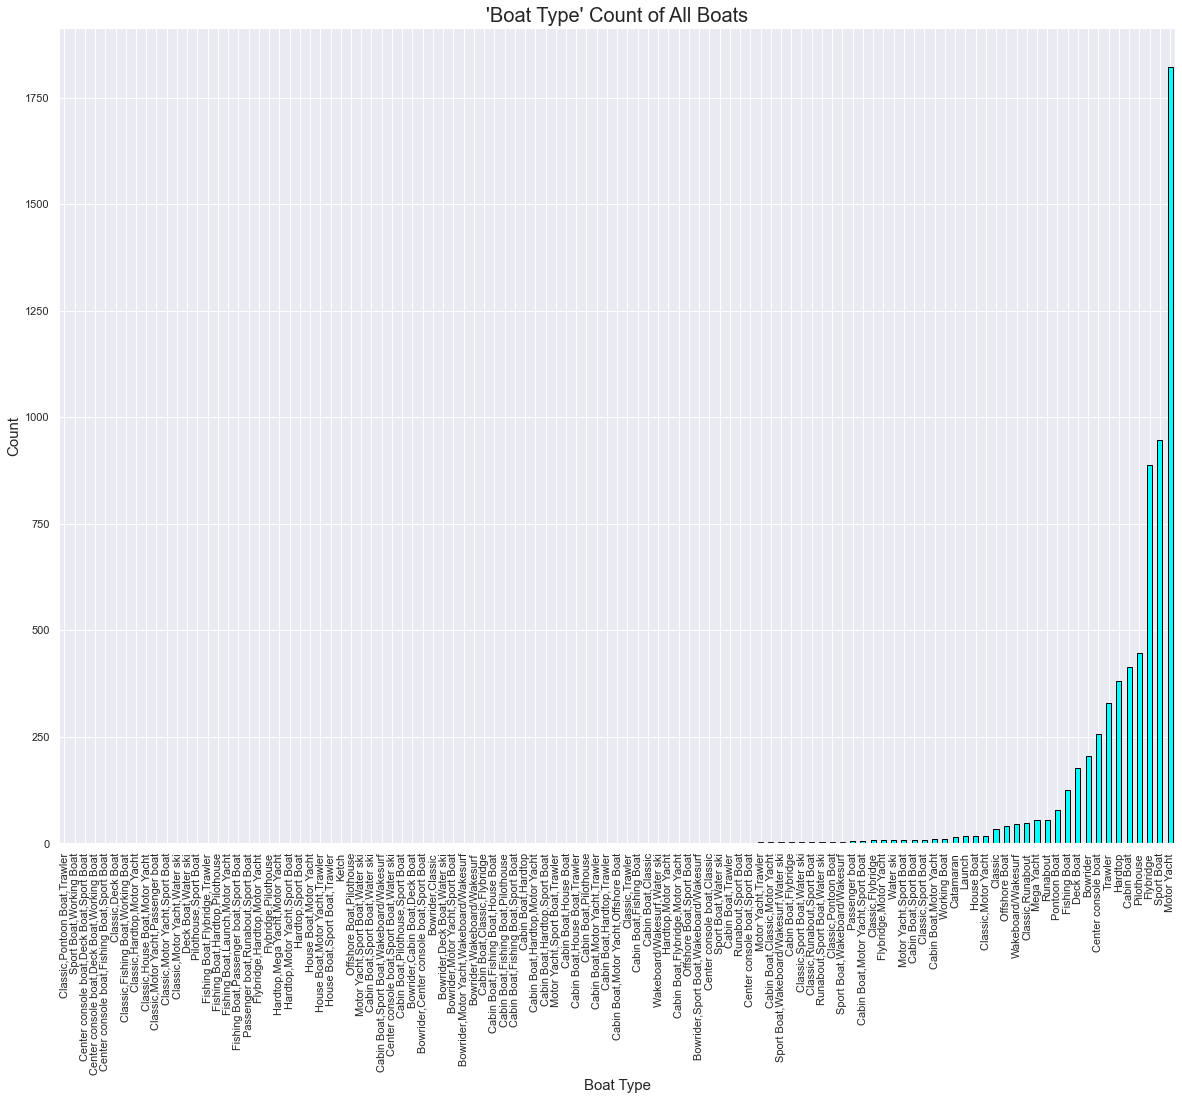

In [52]:
import matplotlib.ticker as ticker
fig = plt.figure(figsize=(20,15))
btype_o = df.groupby('Boat Type').size().sort_values(ascending=True)
g = btype_o.plot(kind='bar',colormap='cool',edgecolor='black')
g.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
plt.xlabel("Boat Type", size=15)
plt.ylabel("Count", size=15)
plt.title("'Boat Type' Count of All Boats", size=20)
plt.savefig('boattype(all).png')

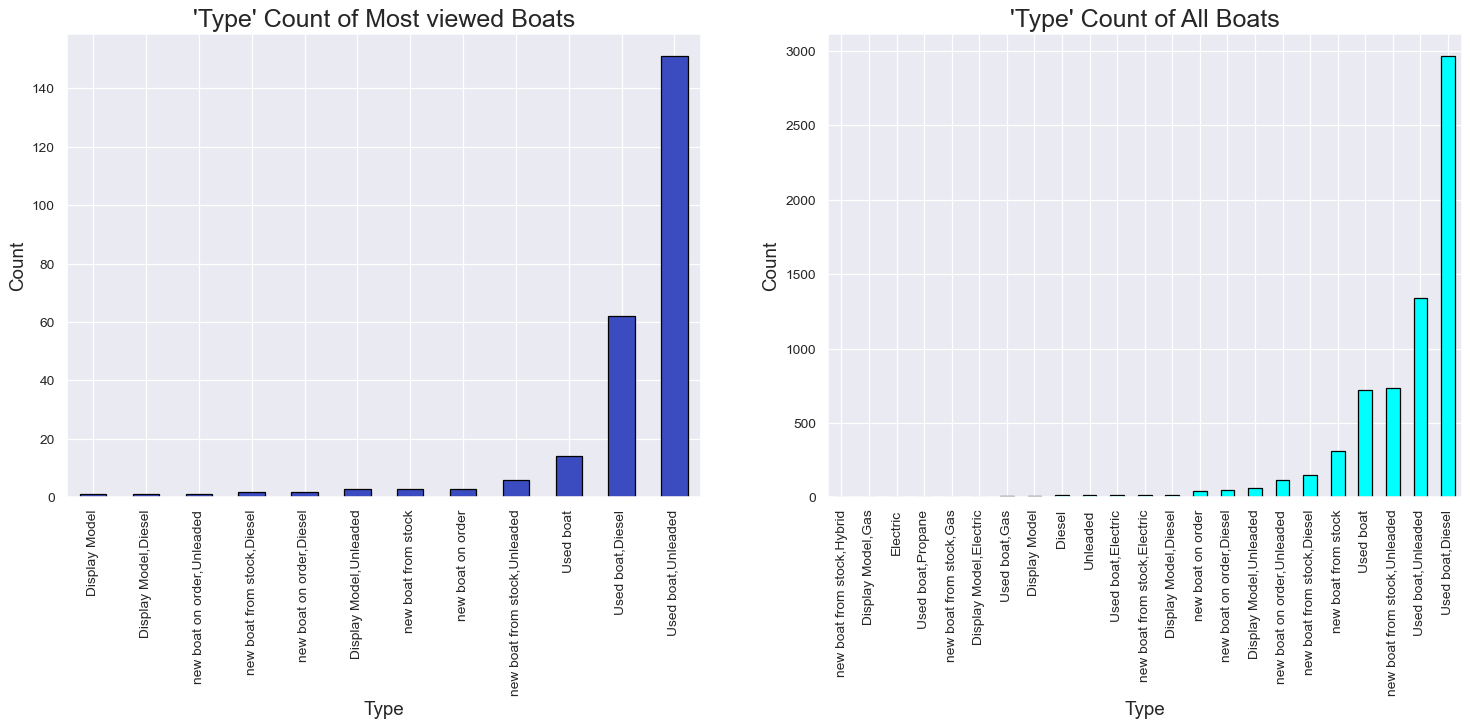

In [54]:
fig = plt.figure(figsize=(20,15),dpi=90)
sns.set(font_scale=1)
types = most_viewed.groupby('Type').size().sort_values(ascending=True)
ax1 = fig.add_subplot(223)
types.plot(kind='bar',colormap='coolwarm',edgecolor='black',ax=ax1)
ax1.set_xlabel("Type", size=15)
ax1.set_ylabel("Count", size=15)
ax1.set_title("'Type' Count of Most viewed Boats", size=20)

types_o = df.groupby('Type').size().sort_values(ascending=True)
ax2 = fig.add_subplot(224)
types_o.plot(kind='bar',colormap='cool',edgecolor='black',ax=ax2)
ax2.set_xlabel("Type", size=15)
ax2.set_ylabel("Count", size=15)
ax2.set_title("'Type' Count of All Boats", size=20)
plt.savefig('Type.png')
plt.show();

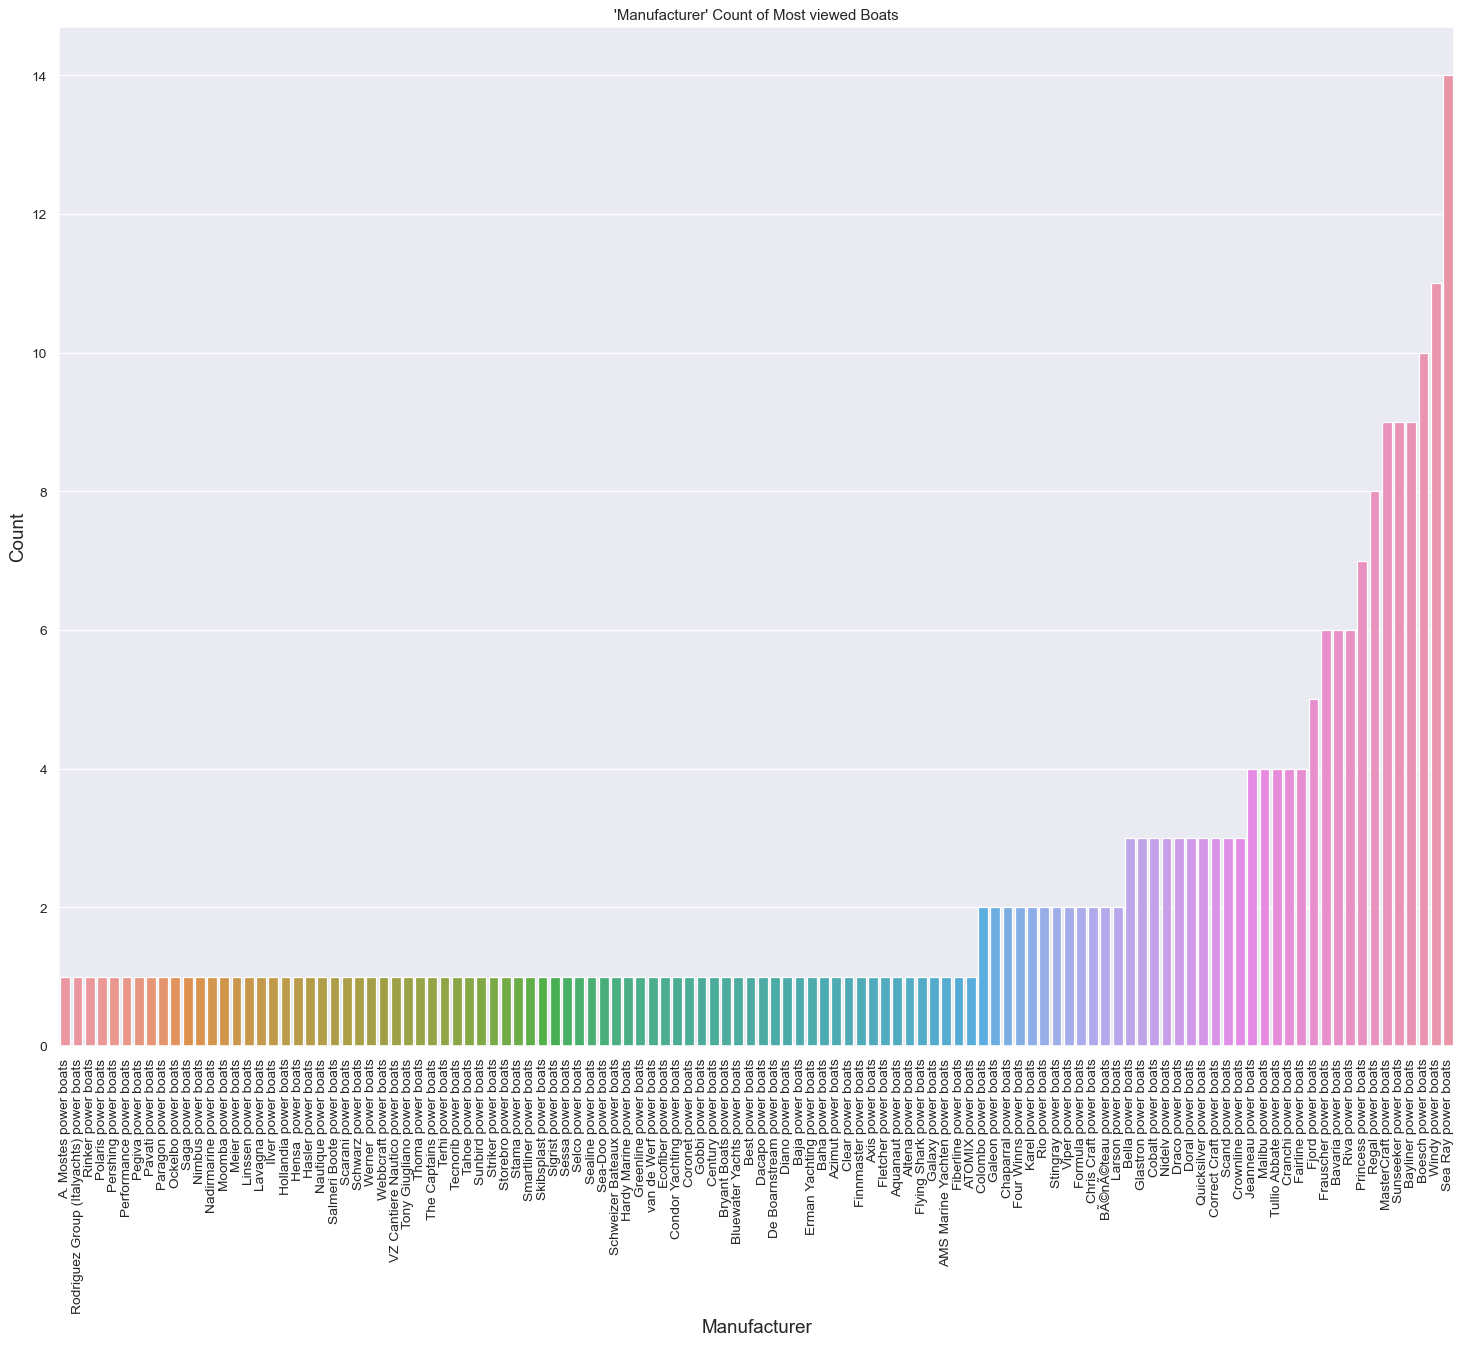

In [55]:
fig = plt.figure(figsize=(20,15),dpi=90)
man = most_viewed.groupby('Manufacturer').size().sort_values(ascending=True).reset_index()
man = pd.DataFrame(man)
man.columns = ['Manufacturer','Count']
sns.barplot(x='Manufacturer',y='Count', data=man)
plt.xlabel('Manufacturer', size=15)
plt.ylabel('Count', size=15)
plt.title("'Manufacturer' Count of Most viewed Boats")
plt.xticks(rotation=90);

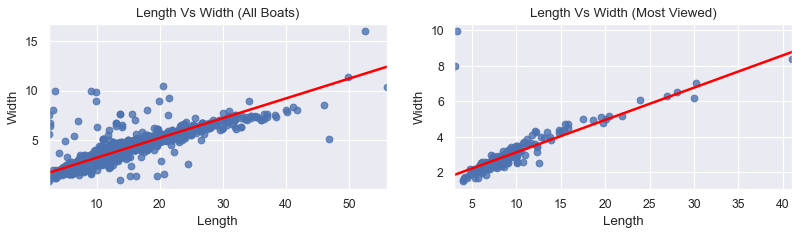

In [57]:
fig = plt.figure(figsize=(12,6),dpi=80)
ax1 = fig.add_subplot(223)
sns.regplot(x='Length', y='Width', data=df, line_kws={"color": "red"}, ci=None, ax=ax1)
ax1.set_title('Length Vs Width (All Boats)')

ax2 = fig.add_subplot(224)
sns.regplot(x='Length', y='Width', data=most_viewed, line_kws={'color': 'red'}, ci=None, x_jitter=0.1,ax=ax2)
ax2.set_title('Length Vs Width (Most Viewed)')
plt.savefig('LengthVsWidth.png')

# Modeling

In [58]:
# seperating the features from class labels
X= df.drop('Number of views last 7 days',axis=1)
y = df['Number of views last 7 days']

In [60]:
# split dataset for train and test
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ValueError: could not convert string to float: 'Sport Boat'